<a href="https://colab.research.google.com/github/ShubhamKrMishra/Cat_Dog_Image_Dataset/blob/main/Cat_Dog_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip "/content/Image Dataset.zip" -d Image

Archive:  /content/Image Dataset.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/Image Dataset.zip or
        /content/Image Dataset.zip.zip, and cannot find /content/Image Dataset.zip.ZIP, period.


In [2]:
import zipfile
zip_ref = zipfile.ZipFile("/content/Dataset.zip")
zip_ref.extractall('/content')
zip_ref.close()

In [1]:
import os
from skimage.io import imread
from skimage.transform import resize
from PIL import Image
import numpy as np

In [2]:
input_dir = "/content/drive/MyDrive/Cats and Dogs Image/Image Dataset"

In [3]:
categories = ['cats', 'dogs']
for category in categories:
  for file in os.listdir(os.path.join(input_dir, category)):
    img_path = os.path.join(input_dir, category,file)
    print(img_path)


/content/drive/MyDrive/Cats and Dogs Image/Image Dataset/cats/cat.147.jpg
/content/drive/MyDrive/Cats and Dogs Image/Image Dataset/cats/cat.16.jpg
/content/drive/MyDrive/Cats and Dogs Image/Image Dataset/cats/cat.140.jpg
/content/drive/MyDrive/Cats and Dogs Image/Image Dataset/cats/cat.12.jpg
/content/drive/MyDrive/Cats and Dogs Image/Image Dataset/cats/cat.106.jpg
/content/drive/MyDrive/Cats and Dogs Image/Image Dataset/cats/cat.164.jpg
/content/drive/MyDrive/Cats and Dogs Image/Image Dataset/cats/cat.159.jpg
/content/drive/MyDrive/Cats and Dogs Image/Image Dataset/cats/cat.137.jpg
/content/drive/MyDrive/Cats and Dogs Image/Image Dataset/cats/cat.152.jpg
/content/drive/MyDrive/Cats and Dogs Image/Image Dataset/cats/cat.108.jpg
/content/drive/MyDrive/Cats and Dogs Image/Image Dataset/cats/cat.17.jpg
/content/drive/MyDrive/Cats and Dogs Image/Image Dataset/cats/cat.103.jpg
/content/drive/MyDrive/Cats and Dogs Image/Image Dataset/cats/cat.165.jpg
/content/drive/MyDrive/Cats and Dogs Imag

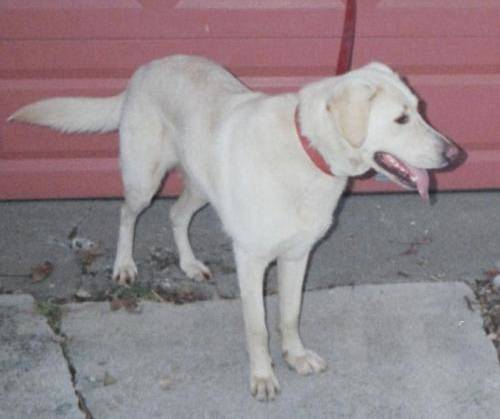

In [5]:
Image.open("/content/drive/MyDrive/Cats and Dogs Image/Image Dataset/dogs/dog.978.jpg")

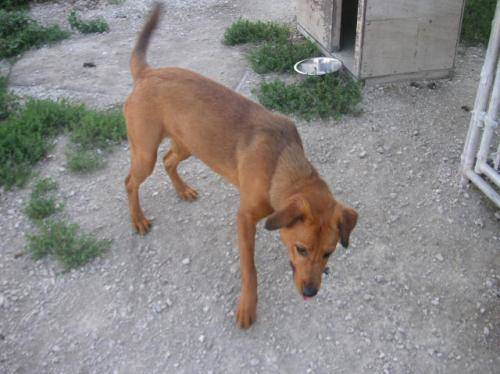

In [6]:
Image.open("/content/drive/MyDrive/Cats and Dogs Image/Image Dataset/dogs/dog.854.jpg")

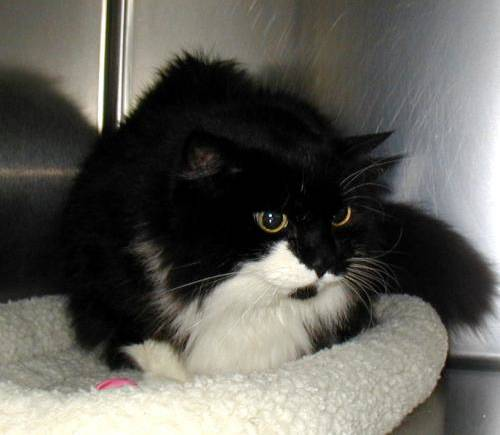

In [7]:
Image.open("/content/drive/MyDrive/Cats and Dogs Image/Image Dataset/cats/cat.928.jpg")

In [10]:
data = []
labels = []

for category_idx, category in enumerate(categories):
  for file in os.listdir(os.path.join(input_dir, category)):
    img_path = os.path.join(input_dir, category, file)
    img = imread(img_path)
    img = resize(img, (15, 15))
    img = img.astype('float')
    img /= 255
    data.append(img.flatten())
    labels.append(category_idx)

  # labels = np.asarray(labels)
  # data = np.asarray(data)

In [11]:
labels = np.asarray(labels)
data = np.asarray(data)

In [12]:
data

array([[0.00387722, 0.00387722, 0.00387722, ..., 0.00212802, 0.00311529,
        0.00324773],
       [0.00235352, 0.00230618, 0.00204027, ..., 0.00221997, 0.00226441,
        0.00224528],
       [0.00068494, 0.00071674, 0.00067062, ..., 0.0011988 , 0.00162711,
        0.0022356 ],
       ...,
       [0.00294046, 0.00273441, 0.00242583, ..., 0.00188134, 0.00191335,
        0.00151328],
       [0.00247114, 0.00248353, 0.00255814, ..., 0.00307793, 0.0030147 ,
        0.00279499],
       [0.00215256, 0.00142867, 0.00155812, ..., 0.00242699, 0.00247952,
        0.002583  ]])

In [13]:
labels

array([0, 0, 0, ..., 1, 1, 1])

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, labels, train_size = 0.8, random_state = 40)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [15]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [17]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.6025


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
accuracy_score(y_test, y_pred)

0.52

In [20]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
accuracy_score(y_test, y_pred)

0.6075

In [21]:
# so we can clearly see Random Forest is giving more accuracy on this dataset

In [23]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(random_state=50)
param_grid = {
    'n_estimators' : [200, 500],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'max_depth': [4,5,6, 7,8],
    'criterion' : ['gini', 'entropy']
}
cv_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv = 5)
cv_rfc.fit(x_train, y_train)
cv_rfc.best_params_
rfc1 = RandomForestClassifier(random_state = 60, max_features='auto', n_estimators=200, max_depth=8, criterion='gini')
rfc1.fit(x_train, y_train)
pred = rfc1.predict(x_test)
print("Accuracy for Random Forest on data: ", accuracy_score(y_test, y_pred
                                                             ))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Accuracy for Random Forest on data:  0.6075
